In [2]:
import sys
from importlib import reload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, random

from IPython.display import display

#from sklearn.decomposition import PCA
import sklearn.linear_model
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.python.keras.utils.vis_utils import plot_model

sys.path.insert(0,'radiative_models')
import radiative_models
reload(radiative_models)
#import radiative_models as rm

new
new


<module 'radiative_models' from 'radiative_models/radiative_models.py'>

## Single variable/output model & one deep layer

### The data

In [2]:
def get_data(nr_train = 10000):
    nr_test = int(0.2* nr_train)
    X_train, train_crystaline_threshold, train_grid = radiative_models.generate_opticallythin_spectra(nr_train)#generate_spectra(10000)
    X_test, test_crystaline_threshold, test_grid = radiative_models.generate_opticallythin_spectra(nr_test)

    # We will start with trying to fit the temperature of the spectrum
    Y_train_fo = train_grid.T[0] # forsterite
    Y_test_fo = test_grid.T[0]
    Y_train_T = train_grid.T[3] # forsterite
    Y_test_T = test_grid.T[3]
    
    return X_train, Y_train_fo, Y_train_T, X_test, Y_test_fo, Y_test_T

### The model

In [3]:
def run_deepNN_oneoutput(X_train, Y_train, X_test, Y_test, neurons = 128, learning_rate=0.005, epochs = 100, verbose=0):

    def make_NN_model(input_shape):
        input_data = tf.keras.Input(shape=input_shape)
        D1 = tf.keras.layers.Dense(units= neurons, activation='relu')(input_data)
        output = tf.keras.layers.Dense(units= 1, name='output')(D1)
        model = tf.keras.Model(inputs=input_data, outputs=output)
        return model

    NN_model = make_NN_model((X_train.shape[1],))

    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    #opt = tf.keras.optimizers.SGD(lr=learning_rate)
    metrics={'output': tf.keras.metrics.RootMeanSquaredError()}
    loss = {'output': tf.keras.losses.MeanSquaredError()}
    
    NN_model.compile(optimizer=opt,
                     loss=loss,
                     metrics=metrics)

    history = NN_model.fit(X_train, Y_train, epochs=epochs, validation_data=(X_test, Y_test), verbose=verbose)
    
    return history, NN_model

### Fit for forsterite abundance

In [96]:
results = []
# Not better: {'a': 0.001, 'n': 128, 'e':300, 'nr_train':10000}
#             {'a': 0.01, 'n': 256, 'e':150, 'nr_train':10000}
# BEtter but too slow: {'a': 0.01, 'n': 128, 'e':20, 'nr_train':500000}
for p in [{'a': 0.01, 'n': 128, 'e':150, 'nr_train':10000},
          {'a': 0.01, 'n': 128, 'e':20, 'nr_train':100000},
         ]:
    alpha = p['a']
    neurons = p['n']
    epochs = p['e']
    nr_train = p['nr_train']

    X_train, Y_train_fo, _, X_test, Y_test_fo, _ = get_data(nr_train)
    
    history, model = run_deepNN_oneoutput(
        X_train, Y_train_fo, X_test, Y_test_fo,
        neurons = neurons, learning_rate=alpha, 
        epochs = epochs, verbose=0)
    results.append([alpha, neurons, epochs,nr_train,
                    history.history['loss'][-1], 
                    history, model.predict(X_test),
                    model, Y_test_fo])
    print('nr_train: ', nr_train, 'neurons: ', neurons, 'alpha: ', alpha, 'epochs: ', epochs, 'loss: ', history.history['loss'][-1])

New resolution:  0.2013 +/- 0.0
Nan values:  False
New resolution:  0.2013 +/- 0.0
Nan values:  False
nr_train:  10000 neurons:  128 alpha:  0.01 epochs:  150 loss:  0.009071769592538475
New resolution:  0.2013 +/- 0.0
Nan values:  False
New resolution:  0.2013 +/- 0.0
Nan values:  False
nr_train:  100000 neurons:  128 alpha:  0.01 epochs:  20 loss:  0.008089452619478106


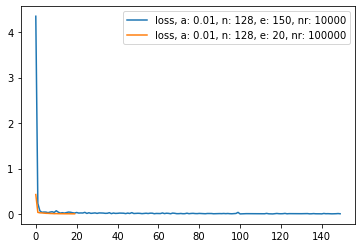

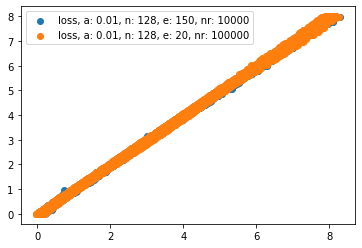

In [97]:
for i in range(len(results)):
    plt.plot(results[i][5].history['loss'], \
             label="loss"+\
             ", a: "+str(results[i][0])+\
             ", n: "+str(results[i][1])+\
             ", e: "+str(results[i][2])+\
             ", nr: "+str(results[i][3])
                )
plt.legend()
plt.show()

for i in range(len(results)):
    plt.scatter(results[i][6], results[i][8],\
             label="loss"+\
             ", a: "+str(results[i][0])+\
             ", n: "+str(results[i][1])+\
             ", e: "+str(results[i][2])+\
             ", nr: "+str(results[i][3])
                )
plt.legend()
plt.show()

#plt.show()


### Fit for temperature

In [95]:
results = []
# Not better: {'a': 0.001, 'n': 128, 'e':300, 'nr_train':10000}
#             {'a': 0.01, 'n': 256, 'e':150, 'nr_train':10000}
# BEtter but too slow: {'a': 0.01, 'n': 128, 'e':20, 'nr_train':500000}
for p in [{'a': 0.01, 'n': 128, 'e':20, 'nr_train':10000},
          #{'a': 0.01, 'n': 128, 'e':20, 'nr_train':100000}
         ]:
    alpha = p['a']
    neurons = p['n']
    epochs = p['e']
    nr_train = p['nr_train']

    X_train, _, Y_train_T, X_test, _, Y_test_T = get_data(nr_train)

    history, model = run_deepNN_oneoutput(
        X_train, Y_train_T, X_test, Y_test_T,
        neurons = neurons, learning_rate=alpha, 
        epochs = epochs, verbose=0)
    results.append([alpha, neurons, epochs,nr_train,
                    history.history['loss'][-1], 
                    history, model.predict(X_test),
                    model, Y_test_T])
    print('nr_train: ', nr_train, 'neurons: ', neurons, 'alpha: ', alpha, 'epochs: ', epochs, 'loss: ', history.history['loss'][-1])

New resolution:  0.2013 +/- 0.0
Nan values:  False
New resolution:  0.2013 +/- 0.0
Nan values:  False
nr_train:  10000 neurons:  128 alpha:  0.01 epochs:  20 loss:  2.7725254943847655


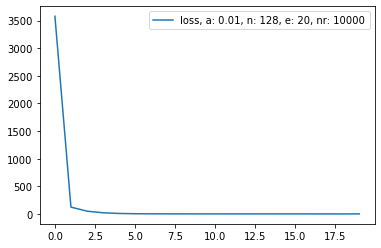

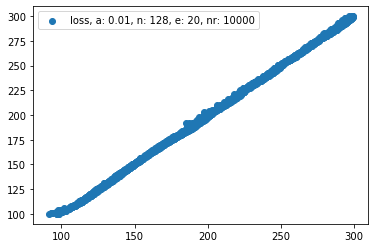

In [94]:
for i in range(len(results)):
    plt.plot(results[i][5].history['loss'], \
             label="loss"+\
             ", a: "+str(results[i][0])+\
             ", n: "+str(results[i][1])+\
             ", e: "+str(results[i][2])+\
             ", nr: "+str(results[i][3])
                )
plt.legend()
plt.show()

for i in range(len(results)):
    plt.scatter(results[i][6], results[i][8],\
             label="loss"+\
             ", a: "+str(results[i][0])+\
             ", n: "+str(results[i][1])+\
             ", e: "+str(results[i][2])+\
             ", nr: "+str(results[i][3])
                )
plt.legend()
plt.show()

#plt.show()


## Two variables/output models

In [4]:
def run_deepNN_two_outputs(X_train, Y_train, X_test, Y_test, neurons = 128,\
                           learning_rate=0.005, epochs = 100, verbose=0):

    def make_NN_model(input_shape):
        input_data = tf.keras.Input(shape=input_shape)
        D_fo1 = tf.keras.layers.Dense(units= neurons, activation='relu')(input_data)
        
        D_T1 = tf.keras.layers.Dense(units= neurons, activation='relu')(input_data)

        output_fo = tf.keras.layers.Dense(units= 1, name='output_fo')(D_fo1)
        output_T = tf.keras.layers.Dense(units= 1, name='output_T')(D_T1)
        model = tf.keras.Model(inputs=input_data, outputs=[output_fo, output_T])
        return model

    NN_model = make_NN_model((X_train.shape[1],))

    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    #opt = tf.keras.optimizers.SGD(lr=learning_rate)
    metrics={'output_fo': tf.keras.metrics.RootMeanSquaredError(),\
            'output_T': tf.keras.metrics.RootMeanSquaredError()}
    loss = {'output_fo': 'mse',#tf.keras.losses.MeanSquaredError(),\
           'output_T': 'mse'}#tf.keras.losses.MeanSquaredError()}

    
    NN_model.compile(optimizer=opt,
                     loss=loss,
                     metrics=metrics)


    
    history = NN_model.fit(X_train, Y_train, epochs=epochs, \
                           batch_size=10,\
                           validation_data=(X_test, Y_test), verbose=verbose)

    
    
    return history, NN_model

New resolution:  0.2013 +/- 0.0
149 150 pipo
Nan values:  False
New resolution:  0.2013 +/- 0.0
149 150 pipo
Nan values:  False
nr_train:  10000 neurons:  alpha:  0.005 epochs:  100 loss:  1.1639794237539172 output_fo_loss:  0.016762067 output_T_loss:  1.1472166


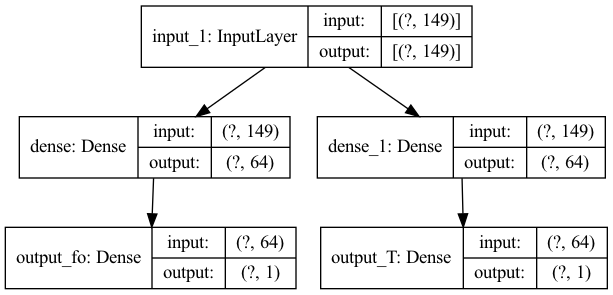

In [5]:
results = []
# Does not work: 
# - One layer does not work
# - Two layer do not wor

# Starts to work
# - Second layer for only forsterite starts to work

# Important: got it to work with the Adam optimizer, not the SGD
for p in [{'a': 0.005, 'n': 64, 'e':100, 'nr_train':10000},\
          #{'a': 0.001, 'n': 128, 'n2':64, 'n3':32, 'e':20, 'nr_train':10000},\
         ]:
    alpha = p['a']
    neurons = p['n']
    epochs = p['e']
    nr_train = p['nr_train']

    X_train, Y_train_fo, Y_train_T, X_test, Y_test_fo, Y_test_T = get_data(nr_train)
    Y_train = (Y_train_fo, Y_train_T)
    Y_test = (Y_test_fo, Y_test_T)
    
    history, model = run_deepNN_two_outputs(
        X_train, Y_train, X_test, Y_test,
        neurons = neurons, \
        learning_rate=alpha, 
        epochs = epochs, verbose=0)
    results.append([alpha, neurons, epochs,nr_train,
                    history.history['loss'][-1], 
                    history, model.predict(X_test),
                    model, Y_test])
    print('nr_train: ', nr_train, 'neurons: ', \
          'alpha: ', alpha, 'epochs: ', epochs, \
          'loss: ', history.history['loss'][-1],\
          'output_fo_loss: ', history.history['output_fo_loss'][-1],\
          'output_T_loss: ', history.history['output_T_loss'][-1],\
         )

    display(plot_model(model, show_shapes=True, show_layer_names=True, to_file='outer-model.png'))
    


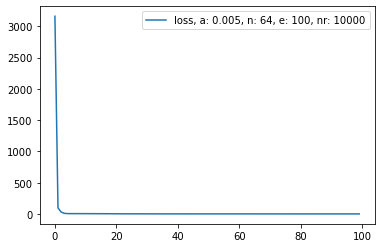

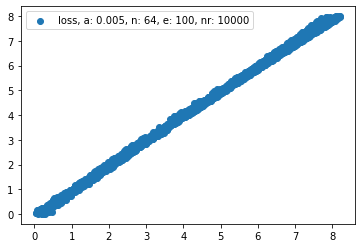

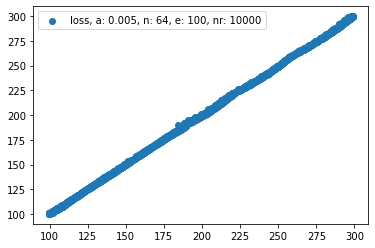

In [6]:
for i in range(len(results)):
    plt.plot(results[i][5].history['loss'], \
             label="loss"+\
             ", a: "+str(results[i][0])+\
             ", n: "+str(results[i][1])+\
             ", e: "+str(results[i][2])+\
             ", nr: "+str(results[i][3])
                )
plt.legend()
plt.show()

for i in range(len(results)):
    plt.scatter(results[i][6][0], results[i][8][0],\
             label="loss"+\
             ", a: "+str(results[i][0])+\
             ", n: "+str(results[i][1])+\
             ", e: "+str(results[i][2])+\
             ", nr: "+str(results[i][3])
                )
plt.legend()
plt.show()

for i in range(len(results)):
    plt.scatter(results[i][6][1], results[i][8][1],\
             label="loss"+\
             ", a: "+str(results[i][0])+\
             ", n: "+str(results[i][1])+\
             ", e: "+str(results[i][2])+\
             ", nr: "+str(results[i][3])
                )
plt.legend()
plt.show()

In [37]:
X_train.shape

(10000, 149)

In [7]:
reload(radiative_models)

directory = "data/raw/TTau/IRS-Christian/"
files = os.listdir(directory)
exclude = [files[15]]
obs_spectra, source_names = [], []
for f in files:
    if f in exclude:
        print("Excluding: ", f)
    else:
        obj_name = f.split('.csv')[0] # Get the object name from the file name
        source_names.append(obj_name)
        s = pd.read_csv(os.path.join(directory, f)).rename(columns = {'wavelength':'w', 'flux':'f'}) 
        obs_spectra.append(s)
print("Number of observed objects: ", len(obs_spectra))

new
Excluding:  TW-Hya.csv
Number of observed objects:  25


In [8]:
i = 0
bins, w = radiative_models.generate_bins(150)
s = radiative_models.rebin(obs_spectra[i], bins=bins, wavelength_col = "w", value_col = "f", handle_nan = True)

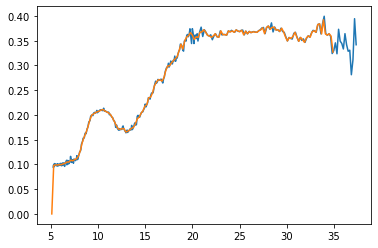

In [9]:
plt.plot(obs_spectra[i]["w"], obs_spectra[i]["f"])
plt.plot(w, s)

In [6]:
s.reshape(1,149).shape

(1, 149)

In [50]:
results[0][7].predict(s.reshape(1,149))

[array([[0.9953314]], dtype=float32), array([[402.0963]], dtype=float32)]

In [ ]:
w, s = calc_spectra(a_fo=, a_en=0.0, a_am=0.9, T, nr_bins=150):